# Basic Scatter plots - ggplot2

![](pics/ggplot1.png)
![](pics/ggplot2.png)

In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5, repr.plot.height=3.75)

In [2]:
WHO = read.csv('data//WHO.csv')
str(WHO)

'data.frame':	194 obs. of  13 variables:
 $ Country                      : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region                       : Factor w/ 6 levels "Africa","Americas",..: 3 4 1 4 1 2 2 4 6 4 ...
 $ Population                   : int  29825 3162 38482 78 20821 89 41087 2969 23050 8464 ...
 $ Under15                      : num  47.4 21.3 27.4 15.2 47.6 ...
 $ Over60                       : num  3.82 14.93 7.17 22.86 3.84 ...
 $ FertilityRate                : num  5.4 1.75 2.83 NA 6.1 2.12 2.2 1.74 1.89 1.44 ...
 $ LifeExpectancy               : int  60 74 73 82 51 75 76 71 82 81 ...
 $ ChildMortality               : num  98.5 16.7 20 3.2 163.5 ...
 $ CellularSubscribers          : num  54.3 96.4 99 75.5 48.4 ...
 $ LiteracyRate                 : num  NA NA NA NA 70.1 99 97.8 99.6 NA NA ...
 $ GNI                          : num  1140 8820 8310 NA 5230 ...
 $ PrimarySchoolEnrollmentMale  : num  NA NA 98.2 78.4 93.1 91.1 NA NA 96.9 NA ...
 $ Prim

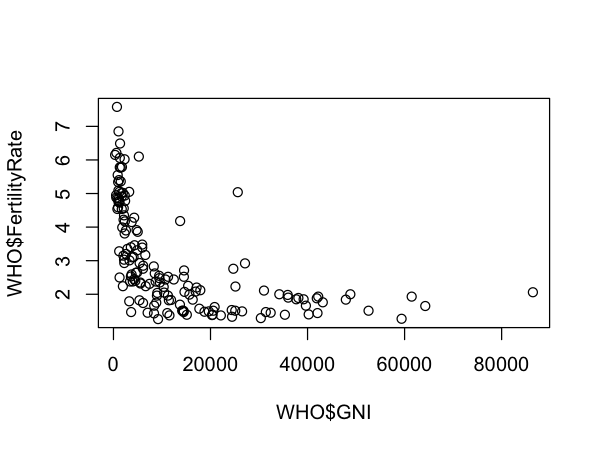

In [3]:
plot(WHO$GNI, WHO$FertilityRate)

In [4]:
# install.package(ggplot2)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [5]:
scatterplot = ggplot(WHO, aes(x = GNI, y = FertilityRate))

Warning message:
: Removed 35 rows containing missing values (geom_point).

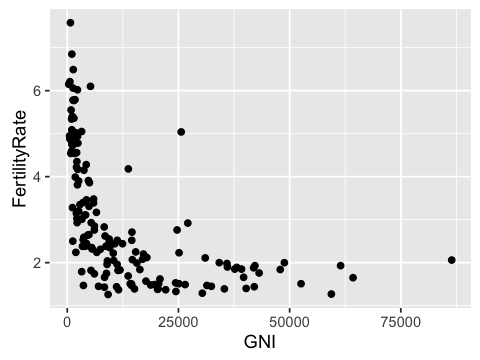

In [6]:
scatterplot + geom_point()

Warning message:
: Removed 32 rows containing missing values (geom_path).

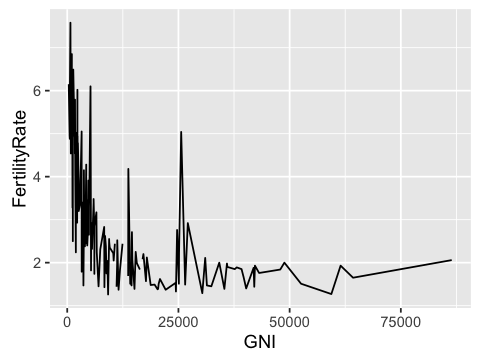

In [7]:
scatterplot + geom_line()

## Change Color, size,shape ...

Warning message:
: Removed 35 rows containing missing values (geom_point).

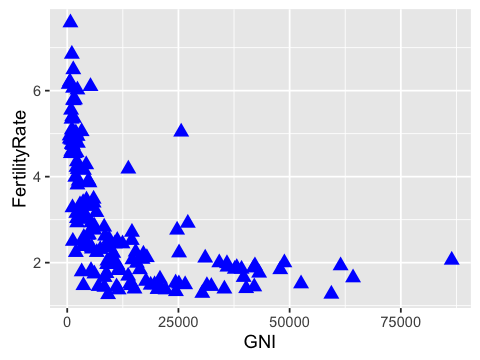

In [8]:
scatterplot + geom_point(color = "blue",
                        size = 3,
                        shape = 17)

Warning message:
: Removed 35 rows containing missing values (geom_point).

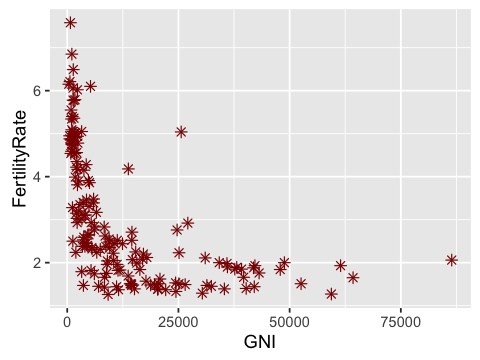

In [9]:
scatterplot + geom_point(color = "darkred",
                        size = 2,
                        shape = 8)

## Adding title ...

Warning message:
: Removed 35 rows containing missing values (geom_point).

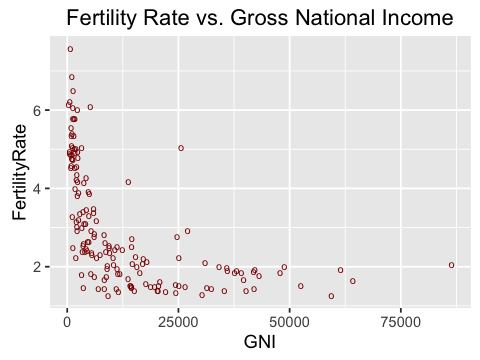

In [10]:
scatterplot + 
    geom_point(color = "darkred",
                        size = 2,
                        shape = 'o') +
    ggtitle("Fertility Rate vs. Gross National Income")
    

# Saving to a pdf file ...

In [17]:
fertilityGNIplot = scatterplot + 
    geom_point(color = "darkred",
                        size = 2,
                        shape = 20) +
    ggtitle("Fertility Rate vs. Gross National Income")

In [18]:
pdf("MyPlot.pdf")
print(fertilityGNIplot)
dev.off()

Warning message:
: Removed 35 rows containing missing values (geom_point).

pdf 
  2

In [19]:
png("MyPlot.png",width=400,height=350)
print(fertilityGNIplot)
dev.off()

Warning message:
: Removed 35 rows containing missing values (geom_point).

pdf 
  2

![](MyPlot.png)

http://www.cookbook-r.com/Graphs/Shapes_and_line_types/

* * *

# Advanced Scatterplots using ggplot

## Color point by another parameter - region

Warning message:
: Removed 35 rows containing missing values (geom_point).

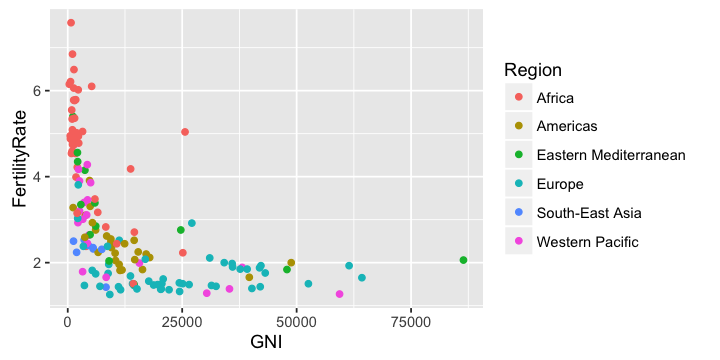

In [21]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(WHO, aes(x = GNI, y = FertilityRate, color=Region)) + 
    geom_point()

Warning message:
: Removed 35 rows containing missing values (geom_point).

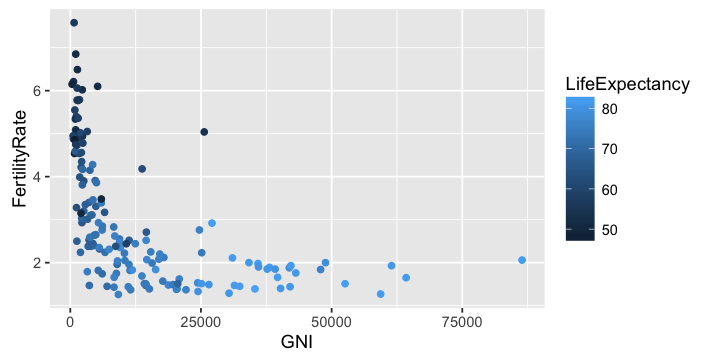

In [22]:
ggplot(WHO, aes(x = GNI, y = FertilityRate, color=LifeExpectancy)) + 
    geom_point()

* * *

## Together with some Linear Regression:

Warning message:
: Removed 11 rows containing missing values (geom_point).

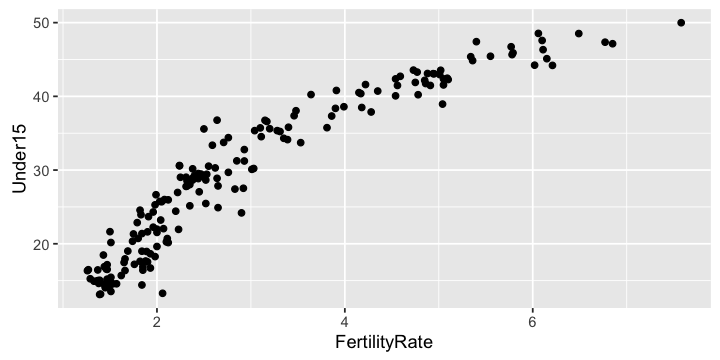

In [23]:
ggplot(WHO, aes(x = FertilityRate, y = Under15)) + 
    geom_point()

Warning message:
: Removed 11 rows containing missing values (geom_point).

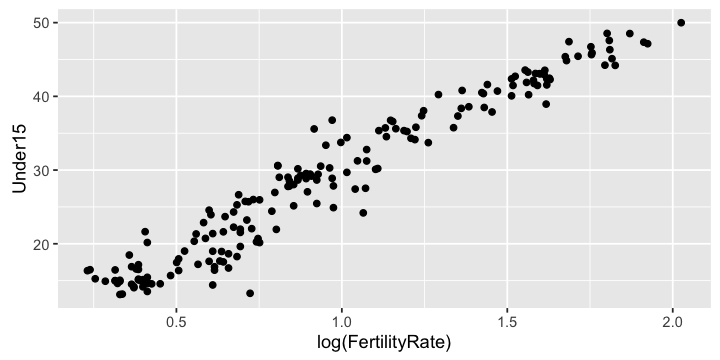

In [24]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + 
    geom_point()

In [25]:
model = lm(Under15 ~ log(FertilityRate), data=WHO)
summary(model)


Call:
lm(formula = Under15 ~ log(FertilityRate), data = WHO)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3131  -1.7742   0.0446   1.7440   7.7174 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.6540     0.4478   17.09   <2e-16 ***
log(FertilityRate)  22.0547     0.4175   52.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 181 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.9391,	Adjusted R-squared:  0.9387 
F-statistic:  2790 on 1 and 181 DF,  p-value: < 2.2e-16


Warning message:
: Removed 11 rows containing non-finite values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

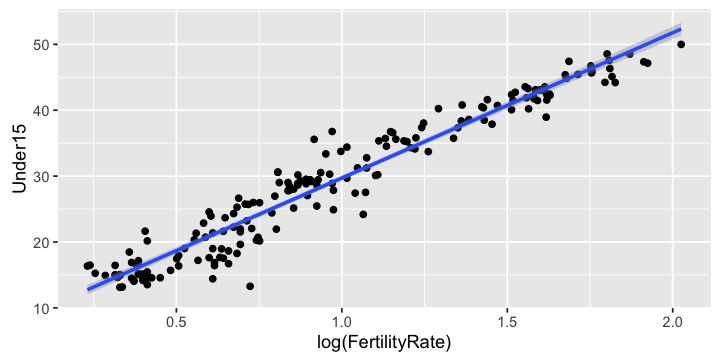

In [26]:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + 
    geom_point() + 
    stat_smooth(method = "lm")

Warning message:
: Removed 11 rows containing non-finite values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

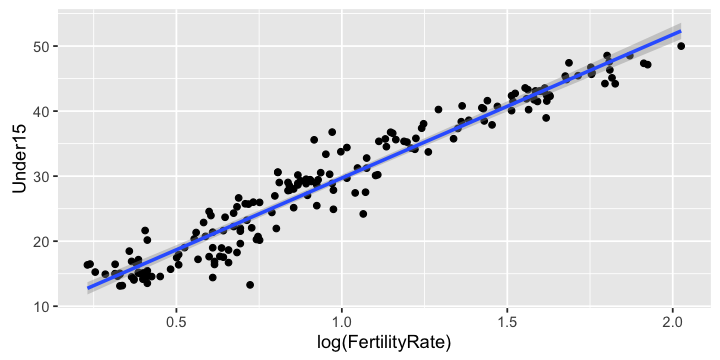

In [28]:
# changing the 95% confidence interval:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + 
    geom_point() + 
    stat_smooth(method = "lm", level = 0.99)

Warning message:
: Removed 11 rows containing non-finite values (stat_smooth).Warning message:
: Removed 11 rows containing missing values (geom_point).

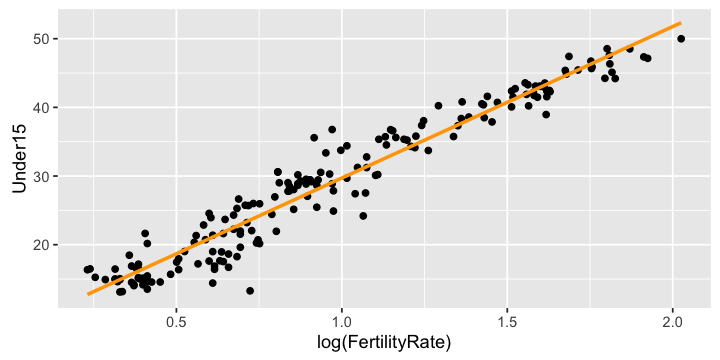

In [30]:
# changing the 95% confidence interval:
ggplot(WHO, aes(x = log(FertilityRate), y = Under15)) + 
    geom_point() + 
    stat_smooth(method = "lm", se = FALSE, color="orange")

Warning message:
: Removed 11 rows containing missing values (geom_point).

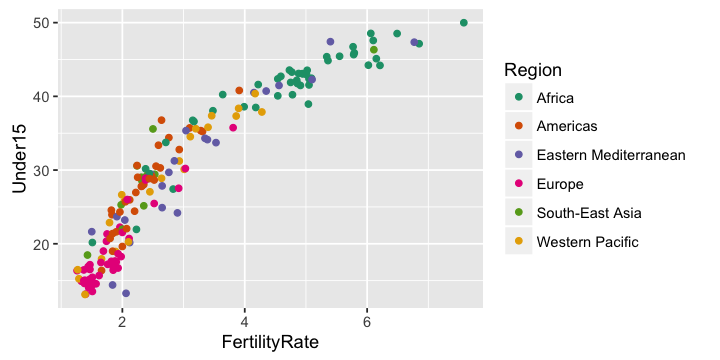

In [32]:
ggplot(WHO, aes(x = FertilityRate, y = Under15, color=Region)) + 
    geom_point() + 
    scale_color_brewer(palette = "Dark2")

http://bconnelly.net/2013/10/creating-colorblind-friendly-figures/